In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.cm import rainbow
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [4]:
data = df.drop(['Occupation', 'Person ID', 'Gender'], axis = 1)

In [5]:
x = data['Sleep Duration']
y = data['Quality of Sleep']

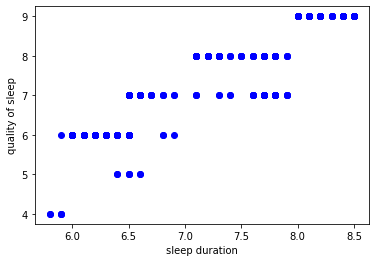

In [6]:
plt.scatter(x, y, c ="blue")
plt.xlabel('sleep duration')
plt.ylabel('quality of sleep')
plt.show()

In [7]:
data.rename(columns = {'Sleep Duration': 'Sleep_Duration', 'Quality of Sleep': 'Quality_of_Sleep', 'BMI Category':'BMI_Category','Blood Pressure':'Blood_Pressure','Heart Rate':'Heart_Rate'}, inplace = True)

In [8]:
data

,Age,Sleep_Duration,Quality_of_Sleep,Physical Activity Level,Stress Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily Steps,Sleep Disorder
0,27,6.1,6,42,6,Overweight,126/83,77,4200,None
1,28,6.2,6,60,8,Normal,125/80,75,10000,None
2,28,6.2,6,60,8,Normal,125/80,75,10000,None
3,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,59,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,59,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,59,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [9]:
def sleepGrade(cols):
    Sleep_Duration  = cols[0]
    Quality_of_Sleep = cols[1]
    if(Sleep_Duration<6):
        Quality_of_Sleep = 4
    if(Sleep_Duration>=6 and Sleep_Duration<6.5):
        Quality_of_Sleep = 5
    if(Sleep_Duration>=6.5 and Sleep_Duration <7):
        Quality_of_Sleep = 6
    if(Sleep_Duration>=7 and Sleep_Duration < 7.5):
        Quality_of_Sleep = 7
    if(Sleep_Duration>= 7.5 and Sleep_Duration < 8):
        Quality_of_Sleep = 8
    if(Sleep_Duration>= 8):
        Quality_of_Sleep = 9
    return Quality_of_Sleep

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep_Duration           374 non-null    float64
 2   Quality_of_Sleep         374 non-null    int64  
 3   Physical Activity Level  374 non-null    int64  
 4   Stress Level             374 non-null    int64  
 5   BMI_Category             374 non-null    object 
 6   Blood_Pressure           374 non-null    object 
 7   Heart_Rate               374 non-null    int64  
 8   Daily Steps              374 non-null    int64  
 9   Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 29.3+ KB


In [11]:
data['Quality_of_Sleep'] = data[['Sleep_Duration', 'Quality_of_Sleep']].apply(sleepGrade, axis = 1)

In [12]:
data.head(350)

,Age,Sleep_Duration,Quality_of_Sleep,Physical Activity Level,Stress Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily Steps,Sleep Disorder
0,27,6.1,5,42,6,Overweight,126/83,77,4200,None
1,28,6.2,5,60,8,Normal,125/80,75,10000,None
2,28,6.2,5,60,8,Normal,125/80,75,10000,None
3,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,28,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...
345,57,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
346,57,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
347,57,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
348,57,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [13]:
data['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [14]:
import seaborn as sns

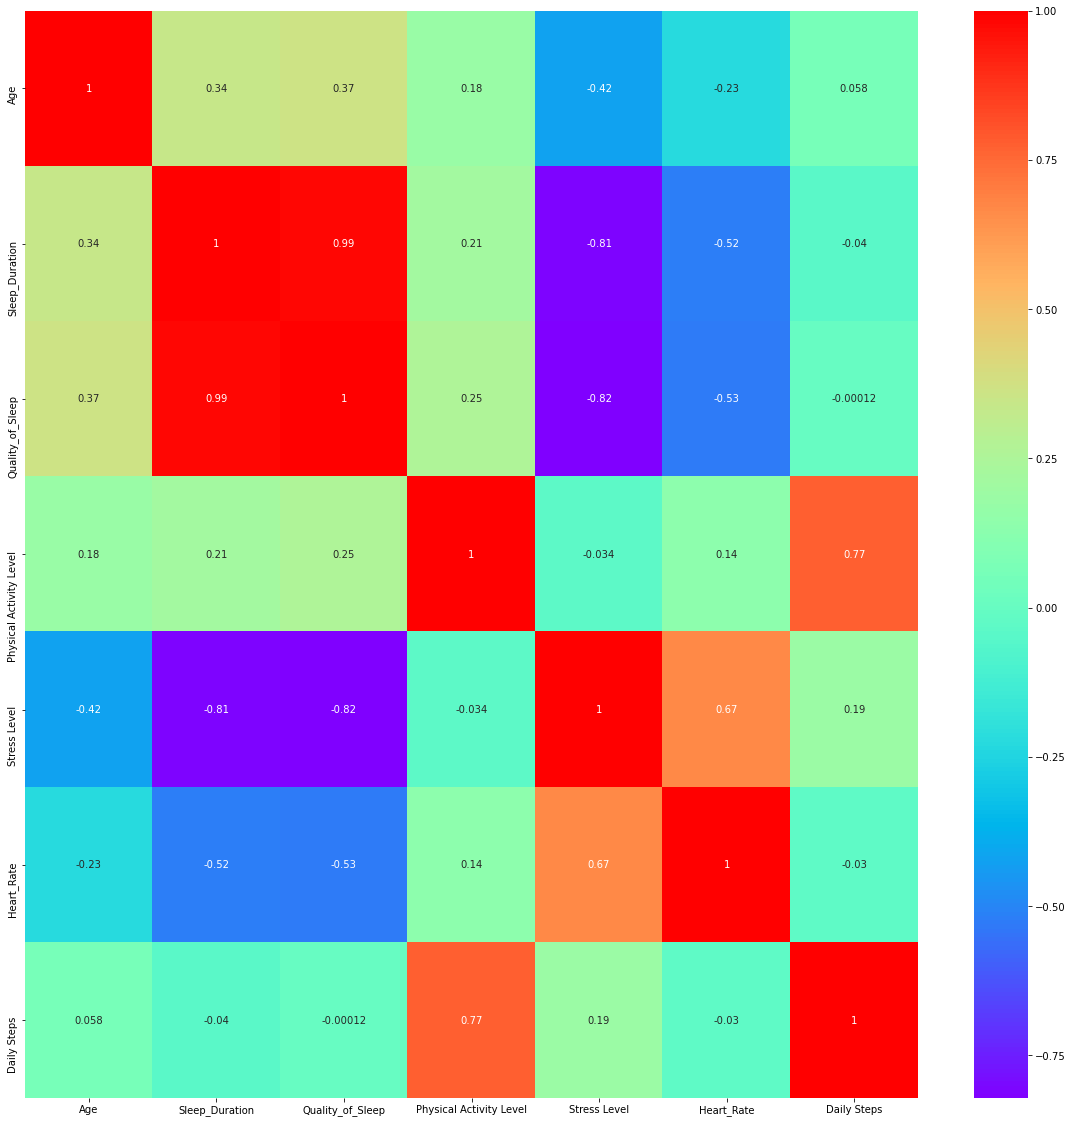

In [15]:
cormat = data.corr()
most_features = cormat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(data[most_features].corr(), annot = True, cmap = 'rainbow')

In [16]:
def wet(cols):
    BMI_Category = cols[0]
    if(BMI_Category == 'Normal' or BMI_Category == 'Normal Weight'):
        BMI_Category = float(1)
    if(BMI_Category == 'Obese' or BMI_Category == 'Overweight'):
        BMI_Category = float(0.1)
    return BMI_Category

In [17]:
data['BMI_Category'] = data['BMI_Category'].apply(wet)

In [18]:
data

,Age,Sleep_Duration,Quality_of_Sleep,Physical Activity Level,Stress Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily Steps,Sleep Disorder
0,27,6.1,5,42,6,O,126/83,77,4200,None
1,28,6.2,5,60,8,N,125/80,75,10000,None
2,28,6.2,5,60,8,N,125/80,75,10000,None
3,28,5.9,4,30,8,O,140/90,85,3000,Sleep Apnea
4,28,5.9,4,30,8,O,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,O,140/95,68,7000,Sleep Apnea
370,59,8.0,9,75,3,O,140/95,68,7000,Sleep Apnea
371,59,8.1,9,75,3,O,140/95,68,7000,Sleep Apnea
372,59,8.1,9,75,3,O,140/95,68,7000,Sleep Apnea


In [19]:
data['BMI_Category'].unique()

array(['O', 'N'], dtype=object)

In [20]:
data['BMI_Category'] = data['BMI_Category'].str.replace('O','0.1')
data['BMI_Category'] = data['BMI_Category'].str.replace('N','1')

In [21]:
data['Blood_Pressure'] = data['Blood_Pressure'].str.replace('/','')

In [22]:
data

,Age,Sleep_Duration,Quality_of_Sleep,Physical Activity Level,Stress Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily Steps,Sleep Disorder
0,27,6.1,5,42,6,0.1,12683,77,4200,None
1,28,6.2,5,60,8,1,12580,75,10000,None
2,28,6.2,5,60,8,1,12580,75,10000,None
3,28,5.9,4,30,8,0.1,14090,85,3000,Sleep Apnea
4,28,5.9,4,30,8,0.1,14090,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,0.1,14095,68,7000,Sleep Apnea
370,59,8.0,9,75,3,0.1,14095,68,7000,Sleep Apnea
371,59,8.1,9,75,3,0.1,14095,68,7000,Sleep Apnea
372,59,8.1,9,75,3,0.1,14095,68,7000,Sleep Apnea


In [23]:
data['BMI_Category'] = pd.to_numeric(data['BMI_Category'])

In [24]:
data['Blood_Pressure'] = pd.to_numeric(data['Blood_Pressure'])

In [25]:
data['Blood_Pressure'].max()

14292

In [26]:
data.rename(columns = {'Sleep Disorder':'Sleep_Disorder'}, inplace = True)

In [27]:
def wet1(cols):
    Sleep_Disorder = cols[0]
    if(Sleep_Disorder == 'Sleep Apnea' or Sleep_Disorder == 'Insomnia'):
        Sleep_Disorder = '0.1'
    if(Sleep_Disorder == 'None'):
        Sleep_Disorder = '1'
    return Sleep_Disorder

In [28]:
data['Sleep_Disorder'] = data['Sleep_Disorder'].apply(wet1)

In [29]:
data['Sleep_Disorder'] = data['Sleep_Disorder'].str.replace('S','0.1')
data['Sleep_Disorder'] = data['Sleep_Disorder'].str.replace('N','1')
data['Sleep_Disorder'] = data['Sleep_Disorder'].str.replace('I','0.1')

In [30]:
data['Sleep_Disorder'] = pd.to_numeric(data['Sleep_Disorder'])

In [31]:
data

,Age,Sleep_Duration,Quality_of_Sleep,Physical Activity Level,Stress Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily Steps,Sleep_Disorder
0,27,6.1,5,42,6,0.1,12683,77,4200,1.0
1,28,6.2,5,60,8,1.0,12580,75,10000,1.0
2,28,6.2,5,60,8,1.0,12580,75,10000,1.0
3,28,5.9,4,30,8,0.1,14090,85,3000,0.1
4,28,5.9,4,30,8,0.1,14090,85,3000,0.1
...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,0.1,14095,68,7000,0.1
370,59,8.0,9,75,3,0.1,14095,68,7000,0.1
371,59,8.1,9,75,3,0.1,14095,68,7000,0.1
372,59,8.1,9,75,3,0.1,14095,68,7000,0.1


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
standardscaler = StandardScaler()
data[['Blood_Pressure','Heart_Rate']] = standardscaler.fit_transform(data[['Blood_Pressure','Heart_Rate']])

In [34]:
data

,Age,Sleep_Duration,Quality_of_Sleep,Physical Activity Level,Stress Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily Steps,Sleep_Disorder
0,27,6.1,5,42,6,0.1,-0.329584,1.654719,4200,1.0
1,28,6.2,5,60,8,1.0,-0.461675,1.170474,10000,1.0
2,28,6.2,5,60,8,1.0,-0.461675,1.170474,10000,1.0
3,28,5.9,4,30,8,0.1,1.474810,3.591698,3000,0.1
4,28,5.9,4,30,8,0.1,1.474810,3.591698,3000,0.1
...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,0.1,1.481223,-0.524383,7000,0.1
370,59,8.0,9,75,3,0.1,1.481223,-0.524383,7000,0.1
371,59,8.1,9,75,3,0.1,1.481223,-0.524383,7000,0.1
372,59,8.1,9,75,3,0.1,1.481223,-0.524383,7000,0.1


In [35]:
data['Blood_Pressure'] = data['Blood_Pressure'].abs()
data['Heart_Rate'] = data['Heart_Rate'].abs()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep_Duration           374 non-null    float64
 2   Quality_of_Sleep         374 non-null    int64  
 3   Physical Activity Level  374 non-null    int64  
 4   Stress Level             374 non-null    int64  
 5   BMI_Category             374 non-null    float64
 6   Blood_Pressure           374 non-null    float64
 7   Heart_Rate               374 non-null    float64
 8   Daily Steps              374 non-null    int64  
 9   Sleep_Disorder           374 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 29.3 KB


In [37]:
data['Health_Value'] = round((data['Physical Activity Level']*data['Quality_of_Sleep']*data['Daily Steps']*10)/(data['Age']*data['Stress Level']*data['Blood_Pressure']*data['Heart_Rate']))

In [38]:
data

,Age,Sleep_Duration,Quality_of_Sleep,Physical Activity Level,Stress Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily Steps,Sleep_Disorder,Health_Value
0,27,6.1,5,42,6,0.1,0.329584,1.654719,4200,1.0,99831.0
1,28,6.2,5,60,8,1.0,0.461675,1.170474,10000,1.0,247842.0
2,28,6.2,5,60,8,1.0,0.461675,1.170474,10000,1.0,247842.0
3,28,5.9,4,30,8,0.1,1.474810,3.591698,3000,0.1,3034.0
4,28,5.9,4,30,8,0.1,1.474810,3.591698,3000,0.1,3034.0
...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,0.1,1.481223,0.524383,7000,0.1,343684.0
370,59,8.0,9,75,3,0.1,1.481223,0.524383,7000,0.1,343684.0
371,59,8.1,9,75,3,0.1,1.481223,0.524383,7000,0.1,343684.0
372,59,8.1,9,75,3,0.1,1.481223,0.524383,7000,0.1,343684.0


In [39]:
(data['Health_Value'].max()/10)*10

37644388.0

In [40]:
data['Health_Value'].max()

37644388.0

In [41]:
data['Health_Value'] = pd.to_numeric(data['Health_Value'])

In [42]:
data.head(1000)

,Age,Sleep_Duration,Quality_of_Sleep,Physical Activity Level,Stress Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily Steps,Sleep_Disorder,Health_Value
0,27,6.1,5,42,6,0.1,0.329584,1.654719,4200,1.0,99831.0
1,28,6.2,5,60,8,1.0,0.461675,1.170474,10000,1.0,247842.0
2,28,6.2,5,60,8,1.0,0.461675,1.170474,10000,1.0,247842.0
3,28,5.9,4,30,8,0.1,1.474810,3.591698,3000,0.1,3034.0
4,28,5.9,4,30,8,0.1,1.474810,3.591698,3000,0.1,3034.0
...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,0.1,1.481223,0.524383,7000,0.1,343684.0
370,59,8.0,9,75,3,0.1,1.481223,0.524383,7000,0.1,343684.0
371,59,8.1,9,75,3,0.1,1.481223,0.524383,7000,0.1,343684.0
372,59,8.1,9,75,3,0.1,1.481223,0.524383,7000,0.1,343684.0


In [43]:
data[['Health_Value', 'Heart_Rate']] = standardscaler.fit_transform(data[['Health_Value', 'Heart_Rate']])

In [44]:
data['Health_Value'] = data['Health_Value'].abs()

In [45]:
data

,Age,Sleep_Duration,Quality_of_Sleep,Physical Activity Level,Stress Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily Steps,Sleep_Disorder,Health_Value
0,27,6.1,5,42,6,0.1,0.329584,1.359411,4200,1.0,0.395373
1,28,6.2,5,60,8,1.0,0.461675,0.640338,10000,1.0,0.380703
2,28,6.2,5,60,8,1.0,0.461675,0.640338,10000,1.0,0.380703
3,28,5.9,4,30,8,0.1,1.474810,4.235707,3000,0.1,0.404967
4,28,5.9,4,30,8,0.1,1.474810,4.235707,3000,0.1,0.404967
...,...,...,...,...,...,...,...,...,...,...,...
369,59,8.1,9,75,3,0.1,1.481223,-0.319069,7000,0.1,0.371204
370,59,8.0,9,75,3,0.1,1.481223,-0.319069,7000,0.1,0.371204
371,59,8.1,9,75,3,0.1,1.481223,-0.319069,7000,0.1,0.371204
372,59,8.1,9,75,3,0.1,1.481223,-0.319069,7000,0.1,0.371204
